# Machine Learning Project Part 1 - Data Preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# remarks: missing values are represented by '?'
df_train = pd.read_csv('dataset/train.csv', na_values='?')
df_test = pd.read_csv('dataset/test.csv', na_values='?')

In [3]:
df_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [5]:
# Important!!! 

# targets in training set are ['<=50K', '>50K']
# targets in testing set are ['<=50K.', '>50K.']

# consistency is needed!!!

In [6]:
df_train['income'] = df_train['income'].map({'>50K':1, '<=50K':0})
df_test['income'] = df_test['income'].map({'>50K.':1, '<=50K.':0})

In [7]:
# concat to form a new dataframe

df = pd.concat([df_train, df_test], axis=0)

In [8]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
16277,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,0
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


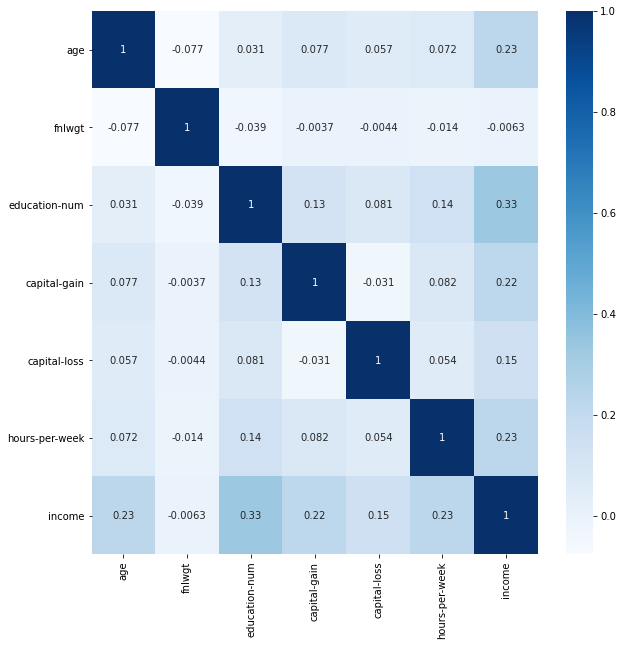

In [9]:
# Correlation matrix

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Blues")
plt.yticks(rotation=0)
#plt.savefig('./graphs/correlation_matrix.png', dpi=720, bbox_inches='tight')
plt.show()

In [10]:
# drop 'fnlwgt' column coz it is not that correlated to 'income'

# drop 'education' column coz the information that it gives us is the same as 'education-num'
# the higher the 'education' , the larger the 'education-num'

In [11]:
df = df.drop(['fnlwgt', 'education'], axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education-num   48842 non-null  int64 
 3   marital-status  48842 non-null  object
 4   occupation      46033 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   capital-gain    48842 non-null  int64 
 9   capital-loss    48842 non-null  int64 
 10  hours-per-week  48842 non-null  int64 
 11  native-country  47985 non-null  object
 12  income          48842 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 5.2+ MB


In [13]:
df.isna().sum()

age                  0
workclass         2799
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

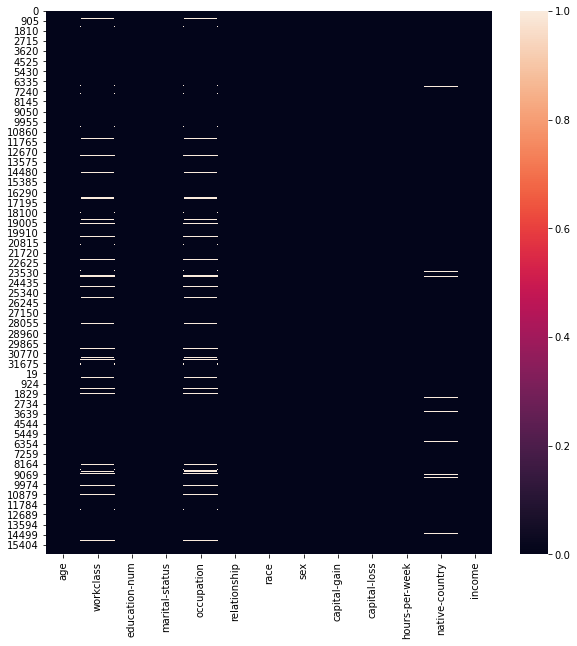

In [14]:
# Missing Values

plt.figure(figsize=(10,10))
sns.heatmap(df.isna())
plt.savefig('./graphs/missing_values.png', dpi=720, bbox_inches='tight')
plt.show()

In [15]:
# Another way to show Missing Values

# find % of missing values in each column

print("% of missing values in each column")
print("\n")
for i in df.columns:
    print(f"{df[{i}].isna().sum()/len(df)*100}")
    print("---------------------------")

% of missing values in each column


age    0.0
dtype: float64
---------------------------
workclass    5.730724
dtype: float64
---------------------------
education-num    0.0
dtype: float64
---------------------------
marital-status    0.0
dtype: float64
---------------------------
occupation    5.751198
dtype: float64
---------------------------
relationship    0.0
dtype: float64
---------------------------
race    0.0
dtype: float64
---------------------------
sex    0.0
dtype: float64
---------------------------
capital-gain    0.0
dtype: float64
---------------------------
capital-loss    0.0
dtype: float64
---------------------------
hours-per-week    0.0
dtype: float64
---------------------------
native-country    1.754637
dtype: float64
---------------------------
income    0.0
dtype: float64
---------------------------


In [16]:
# visualization of missing values

x_list=[]
y_list=[]

for i in df.columns:
    if df[i].isna().sum()/len(df)*100 != 0:
        x_list.append(i)
        y_list.append(df[i].isna().sum()/len(df)*100)        

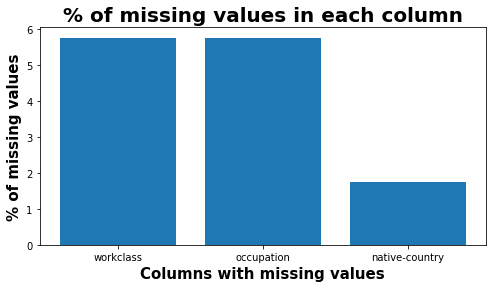

In [17]:
plt.figure(figsize=(8,4))
plt.bar(x_list, y_list)
plt.xticks(rotation=0)
plt.title('% of missing values in each column', size=20, fontweight="bold")
plt.xlabel('Columns with missing values', size=15, fontweight="bold")
plt.ylabel('% of missing values', size=15, fontweight="bold")
plt.show()

In [18]:
# since columns with missing values : 'workclass', 'occupation', 'native_country'
# are all catagorical data
# so fill in by proportional mode

In [19]:
for i in x_list:
    s = df[i].value_counts(normalize=True)
    df.loc[df[i].isna(), i] = np.random.choice(s.index, p=s.values, size=df[i].isna().sum())

In [20]:
df.isna().sum()       # done! no more missing values 

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [21]:
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
16277,64,Private,9,Widowed,Craft-repair,Other-relative,Black,Male,0,0,40,United-States,0
16278,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
16279,44,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [22]:
# Convert categorical data by get_dummies

In [23]:
# find out all categorical columns 
categorical = []
for i in df.columns:
    if df[i].dtype == 'object':
        categorical.append(i)

In [24]:
categorical

['workclass',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [25]:
# apply get_dummies on each categorical column

dummy = []
for k in categorical:
    df_k = pd.get_dummies(df[k], drop_first=True)
    dummy.append(df_k)

In [26]:
# concat all the newly created dataframes

df_dummy = pd.concat(dummy, axis=1)

In [27]:
# finally concat back to the original dataframe

df = pd.concat([df, df_dummy], axis=1)

In [28]:
# drop the original categorical columns

for i in categorical:
    df = df.drop([i], axis=1)

In [29]:
df.shape

(48842, 82)

In [30]:
# Fixing Imbalance Data by up-scaling

In [31]:
df.income.value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [32]:
df.income.value_counts(normalize=True)      # data imbalance

0    0.760718
1    0.239282
Name: income, dtype: float64

In [33]:
# class count

majority, minority = df.income.value_counts()

In [34]:
# divide by class

df_majority = df[df['income'] == 0]
df_minority = df[df['income'] == 1]

In [35]:
# scale up the minority

df_minority_up = df_minority.sample(majority, replace=True)

In [36]:
# concat to form a new/final dataframe

df_final = pd.concat([df_majority, df_minority_up], axis=0)

In [37]:
df_final.shape

(74310, 82)

In [38]:
df_final.income.value_counts(normalize=True)   # imbalance problem solved!!!

0    0.5
1    0.5
Name: income, dtype: float64

In [39]:
df_final

,age,education-num,capital-gain,capital-loss,hours-per-week,income,Local-gov,Never-worked,Private,Self-emp-inc,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25243,33,16,0,0,60,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7131,28,13,0,0,45,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30651,45,14,0,0,65,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
14686,30,9,0,0,52,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#df_final.to_csv(r'/Users/jennifertang/Desktop/cleandata.csv')